IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       5.0 -0.036849   0.027360    1.475030   0.169236         78.0   
1      23.0 -0.062551   0.012280    0.297741   0.127123          0.0   
2       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
3      52.0  0.002450   0.007293   -0.361079   0.085331          0.0   
4       8.0  0.009374   0.007574   -0.460626   0.087413         92.0   
...     ...       ...        ...         ...        ...          ...   
1344    4.0 -0.107485   0.039812   -0.423304   0.226390         49.0   
1345   79.0 -0.013512   0.058681    1.865086   0.242337         94.0   
1346   12.0 -0.014989   0.006156   -0.339726   0.079775         94.0   
1347   85.0 -0.000995   0.007005   -0.240022   0.083604          0.0   
1348   35.0 -0.121003   0.039004   -0.422508   0.231398         84.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            77.0    8.089259    4.625110 -0.017003  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.036849   0.027360    1.475030   0.169236         78.0         77.0   
1    -0.062551   0.012280    0.297741   0.127123          0.0         76.0   
2    -0.032832   0.016999   -0.401113   0.134271        102.0         71.0   
3     0.002450   0.007293   -0.361079   0.085331          0.0        102.0   
4     0.009374   0.007574   -0.460626   0.087413         92.0         80.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.107485   0.039812   -0.423304   0.226390         49.0         67.0   
1345 -0.013512   0.058681    1.865086   0.242337         94.0         92.0   
1346 -0.014989   0.006156   -0.339726   0.079775         94.0         70.0   
1347 -0.000995   0.007005   -0.240022   0.083604          0.0         89.0   
1348 -0.121003   0.039004   -0.422508   0.231398         84.0         61.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.042477   0.026396    1.567547   0.167726         78.0          0.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    8.002383    4.972493 -0.008418   0.009356  ...       5972.693738   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340          3.86272          0.104526           0.349685          3.876192   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               139.0               138.0          20.783587   

     amp2(Curr(ESC_5))  Guasto  
340           4.986456       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.036849   0.027360    1.475030   0.169236         78.0         77.0   
1    -0.062551   0.012280    0.297741   0.127123          0.0         76.0   
2    -0.032832   0.016999   -0.401113   0.134271        102.0         71.0   
3     0.002450   0.007293   -0.361079   0.085331          0.0        102.0   
4     0.009374   0.007574   -0.460626   0.087413         92.0         80.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.107485   0.039812   -0.423304   0.226390         49.0         67.0   
1345 -0.013512   0.058681    1.865086   0.242337         94.0         92.0   
1346 -0.014989   0.006156   -0.339726   0.079775         94.0         70.0   
1347 -0.000995   0.007005   -0.240022   0.083604          0.0         89.0   
1348 -0.121003   0.039004   -0.422508   0.231398         84.0         61.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.036849   0.027360    1.475030   0.169236    78.000000    77.000000   
1    -0.062551   0.012280    0.297741   0.127123     0.000000    76.000000   
2    -0.032832   0.016999   -0.401113   0.134271   102.000000    71.000000   
3     0.002450   0.007293   -0.361079   0.085331     0.000000   102.000000   
4     0.009374   0.007574   -0.460626   0.087413    92.000000    80.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.029314   0.009991    2.109810   0.104043    62.168763    81.460953   
1616 -0.000872   0.007029   -0.250068   0.083748     0.000000   113.078706   
1617 -0.007738   0.011688    2.392897   0.108247    59.654758    78.654758   
1618 -0.000515   0.007027   -0.251477   0.083733     0.000000    90.564835   
1619  0.004404   0.007437   -0.415295   0.086239     0.000000    97.443531   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=50)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=50, score_func=<function f_regression at 0x000001FBC0031120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
  True False False False  True False  True False  True False  True  True
 False False False False False False False False False False  True  True
 False False False False False False False False False  True False  True
  True False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False  True False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.270228
28         freq1(AccX)  3.524216
12         freq1(GyrY)  3.202469
11           RMS(GyrY)  2.845010
9            var(GyrY)  2.681970
153   kurt(RPM(ESC_5))  2.626124
93   freq2(RPM(ESC_1))  2.550138
92   freq1(RPM(ESC_1))  2.535668
14          amp1(GyrY)  2.419512
159   var(Curr(ESC_5))  2.180555
104     <>(RPM(ESC_2))  1.999218
8             <>(GyrY)  1.829993
152    var(RPM(ESC_5))  1.824388
78    amp1(RPM(ESC_0))  1.714599
107    RMS(RPM(ESC_2))  1.692106
22          amp1(GyrZ)  1.614672
32            <>(AccY)  1.581274
62         amp1(Pitch)  1.281407
30          amp1(AccX)  1.074989
80     <>(Curr(ESC_0))  1.069507
17           var(GyrZ)  1.044318
4          freq1(GyrX)  0.969873
76   freq1(RPM(ESC_0))  0.956696
19           RMS(GyrZ)  0.913272
57          var(Pitch)  0.906122
77   freq2(RPM(ESC_0))  0.805212
156   amp1(RPM(ESC_5))  0.762474
97    var(Curr(ESC_1))  0.696211
83    RMS(Curr(ESC_0))  0.665965
81    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.036849   0.027360    78.000000 -0.017003   0.008552   0.093902   
1    -0.062551   0.012280     0.000000  0.017966   0.006574   0.082939   
2    -0.032832   0.016999   102.000000 -0.013156   0.028010   0.167644   
3     0.002450   0.007293     0.000000  0.014756   0.005582   0.076065   
4     0.009374   0.007574    92.000000  0.020949   0.005613   0.077693   
...        ...        ...          ...       ...        ...        ...   
1615 -0.029314   0.009991    62.168763 -0.008898   0.006066   0.078293   
1616 -0.000872   0.007029     0.000000  0.013074   0.005265   0.073648   
1617 -0.007738   0.011688    59.654758  0.062795   0.011072   0.122420   
1618 -0.000515   0.007027     0.000000  0.013211   0.005279   0.073762   
1619  0.004404   0.007437     0.000000  0.015625   0.005727   0.077180   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
0       70.000000    4.142459  

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.042477   0.026396         78.0 -0.008418   0.009356   0.096969   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
340          0.0    8.903809    4.473062   0.007283  ...               83.0   

     freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  var(RPM(ESC_5))  \
340               81.0          1.270438          -0.857865    672853.215726   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340          0.431427       6259.308799       5972.693738          3.86272   

     var(Curr(ESC_5))  
340          0.104526  

[1 rows x 50 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.036849   0.027360    78.000000 -0.017003   0.006975   -1.001582   
1    -0.062551   0.012280     0.000000  0.017966   0.004782   -1.290974   
2    -0.032832   0.016999   102.000000 -0.013156   0.014101   -1.419275   
3     0.002450   0.007293     0.000000  0.014756   0.005717   -0.901791   
4     0.009374   0.007574    92.000000  0.020949   0.005974   -0.890466   
...        ...        ...          ...       ...        ...         ...   
1615 -0.029314   0.009991    62.168763 -0.008898   0.004519   -1.324322   
1616 -0.000872   0.007029     0.000000  0.013074   0.005432   -0.811900   
1617 -0.007738   0.011688    59.654758  0.062795   0.004778   -1.438055   
1618 -0.000515   0.007027     0.000000  0.013211   0.005450   -0.818831   
1619  0.004404   0.007437     0.000000  0.015625   0.005814   -0.910462   

      RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  ...  freq1(Pitch)  \
0      0.167255    1.065945

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.042477   0.026396         78.0 -0.008418   0.007283   -1.238157   

     RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  ...  freq1(Pitch)  \
340   0.161052    0.896824 -0.186414   79.985932  ...         105.0   

     kurt(RPM(ESC_1))  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
340         -0.910553          1.220784           9.499736     5468.906736   

     var(Curr(ESC_2))  kurt(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  \
340          0.156616         -0.515308          1.270438          -0.857865   

     amp2(RPM(ESC_5))  
340       5972.693738  

[1 rows x 21 columns]


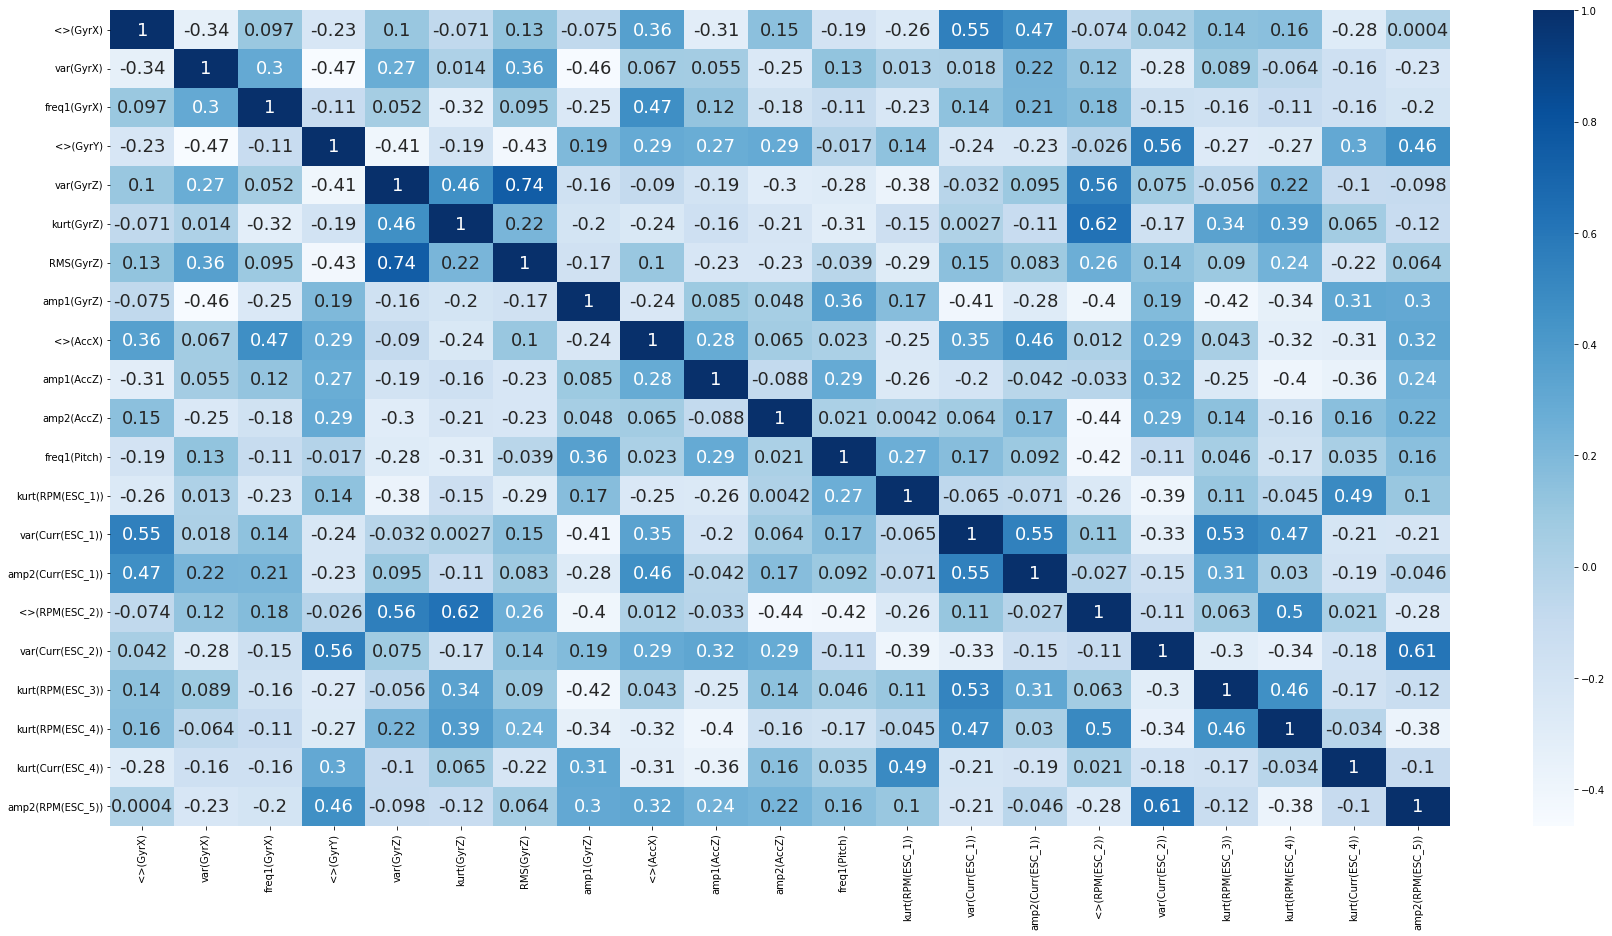

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 21)
(324, 21)
(1296, 1)
(324, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.73846154 0.75675676 0.77606178 0.78764479 0.74517375]
Accuracy: 0.83 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.55       0.4980695  0.46718147 0.4980695  0.52895753]
Accuracy: 0.53 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.78846154 0.65637066 0.62548263 0.59459459 0.67567568]
Accuracy: 0.71 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.58461538 0.52123552 0.61389961 0.54826255 0.67181467]
Accuracy: 0.64 	 ---> SGDClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

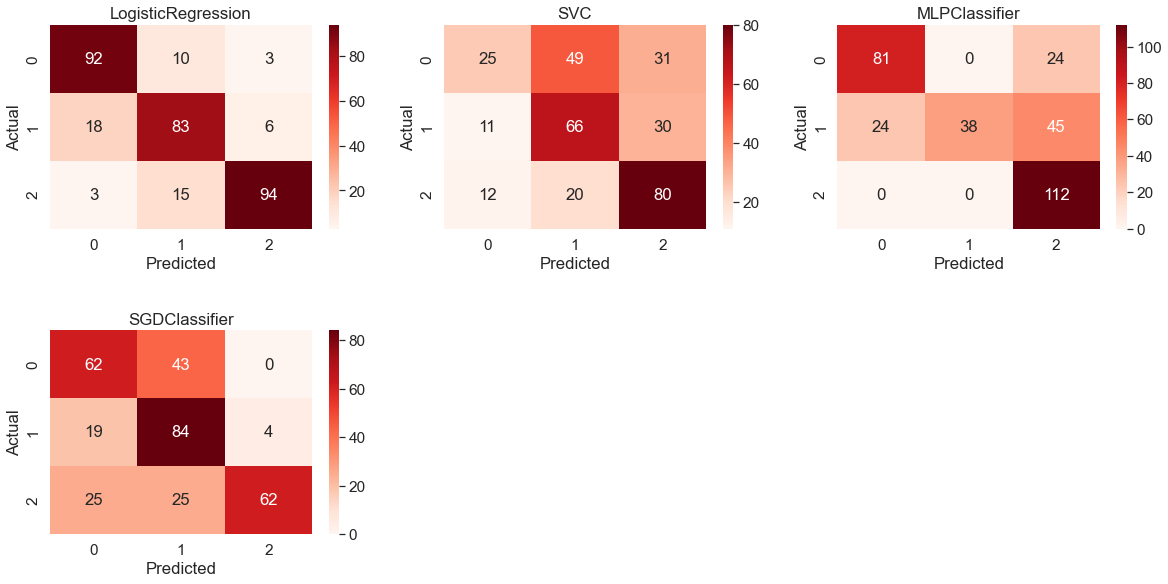

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [25]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.77      0.78      0.77       107
           2       0.91      0.84      0.87       112

    accuracy                           0.83       324
   macro avg       0.83      0.83      0.83       324
weighted avg       0.83      0.83      0.83       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.24      0.33       105
           1       0.49      0.62      0.55       107
           2       0.57      0.71      0.63       112

    accuracy                           0.53       324
   macro avg       0.53      0.52      0.50       324
weighted avg       0.53      0.53      0.50       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       105
           1       1.00